# **IMPORT**

In [3]:
from sympy import symbols, sin
from sympy.plotting import plot

# **plot**

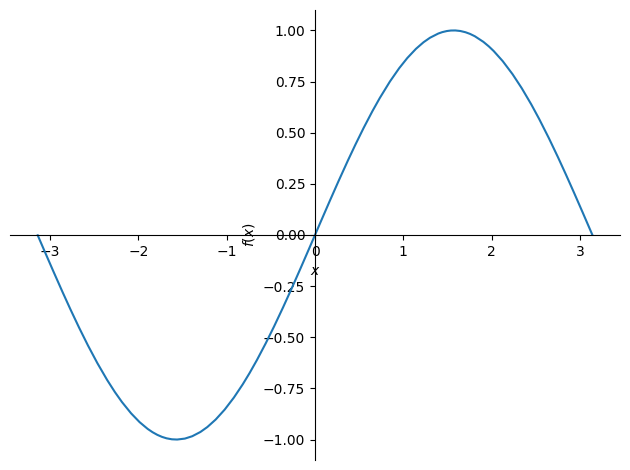

In [2]:

x = symbols('x')
plot(sin(x), (x, -3.14, 3.14))


# **IMPORT**

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Datasets/fake_news_dataset.csv')

# **Download Stopwords**

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
data.head

<bound method NDFrame.head of           id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2        

In [ ]:
data.describe()

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [ ]:
#0-- real news
#1-- fake news

In [ ]:
data.shape

(20800, 5)

# **Checking For Missing Values**

In [ ]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

# **Handling The Missing Value With Null String**

In [ ]:
data=data.fillna('')

# **Merge Author and news Title**

In [ ]:

data['content']= data['author']+' '+data['title']
# data['content'] = data['content'].astype(str)
print(data['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [ ]:
data.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


# **Separating Feature and target,(here content and label)**

In [ ]:
X=data.drop(columns='label', axis =1)
Y=data['label']

In [ ]:
print(X)


          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

# **Stemming**

In [ ]:
port_stem= PorterStemmer()

In [ ]:
#Function that converts all words to key words and ignores stopwors
#Using Regex to find words
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content
                       if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content



In [ ]:
data['content']=data['content'].apply(stemming)

In [ ]:
print(data['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


# **Feature Extraction**

In [ ]:
X= data['content'].values
Y=data['label'].values

In [ ]:
print(X)

['darrel lucu hous dem aid even see comey letter jason chaffetz tweet'
 'daniel j flynn flynn hillari clinton big woman campu breitbart'
 'consortiumnew com truth might get fire' ...
 'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time'
 'alex ansari nato russia hold parallel exercis balkan'
 'david swanson keep f aliv']


In [ ]:
print(Y.shape)

(20800,)


# **Text To  Feature Vectors**

In [ ]:
vector=TfidfVectorizer()
vector.fit(X)
X=vector.transform(X)

In [ ]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# **IMPORT**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
data= pd.read_csv('/content/drive/MyDrive/Datasets/mail_data.csv')

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# **Handling Missing Values**

In [ ]:
data= data.where(pd.notnull(data),'')

In [ ]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
data.shape

(5572, 2)

# **Label Encoding**

In [ ]:
data.loc[data['Category']=='spam','Category']=0
data.loc[data['Category']=='ham','Category']=1

In [ ]:
data.head

<bound method NDFrame.head of      Category                                            Message
0           1  Go until jurong point, crazy.. Available only ...
1           1                      Ok lar... Joking wif u oni...
2           0  Free entry in 2 a wkly comp to win FA Cup fina...
3           1  U dun say so early hor... U c already then say...
4           1  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567        0  This is the 2nd time we have tried 2 contact u...
5568        1               Will ü b going to esplanade fr home?
5569        1  Pity, * was in mood for that. So...any other s...
5570        1  The guy did some bitching but I acted like i'd...
5571        1                         Rofl. Its true to its name

[5572 rows x 2 columns]>

# **Features and Labels**

In [ ]:
X= data['Message']
Y= data['Category']

In [ ]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


# **Train Test Split**

In [ ]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size=0.2, random_state=2)

In [ ]:
print(X_train.shape,X_test.shape, X.shape)

(4457,) (1115,) (5572,)


# **Feature Extraction**

In [ ]:
feature_extraction= TfidfVectorizer(min_df=1,stop_words='english', lowercase=1)
# if any word is used only for once then , it will be ignored in the prediction

**Text to Vector**

In [ ]:
X_train_features=feature_extraction.fit_transform(X_train)
X_test_features=feature_extraction.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


In [ ]:
print(X_train_features, X_test_features)

  (0, 4334)	0.42941702167641554
  (0, 3958)	0.6161071828926097
  (0, 6586)	0.44333254982109394
  (0, 6927)	0.48935591439341625
  (1, 2121)	0.3573617143022146
  (1, 1428)	0.5869421390016223
  (1, 6971)	0.42812434651556874
  (1, 3168)	0.5869421390016223
  (2, 5115)	0.3408491178137899
  (2, 7353)	0.31988118061968496
  (2, 3852)	0.3408491178137899
  (2, 4884)	0.35749230587184955
  (2, 5695)	0.35749230587184955
  (2, 806)	0.26730249393705324
  (2, 5894)	0.35749230587184955
  (2, 1876)	0.28751725124107325
  (2, 6878)	0.35749230587184955
  (3, 197)	0.36522237107066735
  (3, 3723)	0.16297045459835785
  (3, 2435)	0.26698378141852
  (3, 1825)	0.26858331513730566
  (3, 5231)	0.2266831802864503
  (3, 300)	0.2915969875465198
  (3, 7248)	0.23571908490908416
  (3, 5005)	0.3169028431039865
  :	:
  (4454, 2244)	0.2526916142542512
  (4454, 666)	0.28653660324238944
  (4454, 1575)	0.20946314330145205
  (4454, 1094)	0.24862733340971144
  (4454, 5068)	0.22284357632450164
  (4454, 311)	0.19547195974237946
  

# **Labels to integers**


In [ ]:
Y_train= Y_train.astype('int')
Y_test= Y_test.astype('int')

# **Training the model**

In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(X_train_features, Y_train)

LogisticRegression()

# **Evaluation**

**On Training Data**

In [ ]:
prediction_on_train= model.predict(X_train_features)

In [ ]:
accuracy_on_train= accuracy_score(Y_train, prediction_on_train)

In [ ]:
print(accuracy_on_train)

0.9683643706529056


**On Test Data**

In [ ]:
prediction_on_test= model.predict(X_test_features)

In [ ]:
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test)

In [ ]:
print(accuracy_on_test_data )

0.9524663677130045


# **Predictive System**

In [ ]:
input=["I've been searching for the right words to thank you for this br"]

Feature Extraction

In [ ]:
input_features=feature_extraction.transform(input)

**Prediction**

In [ ]:
result= model.predict(input_features)

In [ ]:
if result[0]==1:
  print('Ham')
else:
  print('Spam')


Ham


In [ ]:
 !pip install git+https://github.com/openai/whisper.git
 !sudo apt update && sudo apt install ffmpeg


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-a335894k
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-a335894k
  Resolved https://github.com/openai/whisper.git to commit e8622f9afc4eba139bf796c210f5c01081000472
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 22.7 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20230314-py3-none-any.whl size=798395 sha256=1afe73a3643cb374236f031b8ec05805d6e5e08dbdbaa7531fd1737ce2acca86
  Stored in directory: /tmp/pip-ephem-wheel-cache-gr5mdl5g/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu22

In [ ]:
 !whisper "/content/Types of Relationships In India _ Indian Relationships.mp3" --model medium.en

100%|█████████████████████████████████████| 1.42G/1.42G [00:25<00:00, 59.2MiB/s]
[00:00.000 --> 00:02.700]  J
[00:02.700 --> 00:04.200]  vehicle
[00:04.200 --> 00:04.660]  f
[00:04.660 --> 00:05.500] Alright
[00:05.500 --> 00:07.140]  internet you b
[00:07.140 --> 00:07.580]  we
[00:07.580 --> 00:07.740]  go
[00:07.740 --> 00:08.140]  we
[00:08.140 --> 00:08.220]  say
[00:08.220 --> 00:08.520]  b
[00:08.520 --> 00:08.540]  we
[00:08.540 --> 00:08.880]  they
[00:08.880 --> 00:09.000]  they
[00:09.000 --> 00:09.120]  they
[00:09.140 --> 00:09.160]  we
[00:09.160 --> 00:09.420]  wanna
[00:09.420 --> 00:09.480]  w
[00:09.500 --> 00:09.700]  thing
[00:09.700 --> 00:09.840]  j
[00:09.840 --> 00:09.940]  j
[00:09.940 --> 00:09.980]  j
[00:09.980 --> 00:10.880]  j
[00:10.920 --> 00:10.980]  ok
[00:10.980 --> 00:11.060]  ok
[00:11.060 --> 00:11.100]  they
[00:11.100 --> 00:11.220]  j
[00:11.220 --> 00:11.340]  j
[00:11.340 --> 00:11.420]  y
[00:11.420 --> 00:11.620]  j
[00:11.640 --> 00:11.780]

In [20]:
!pip install easyAI



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.3 MB/s eta 0:00:00


## **GameOfBones**

In [ ]:
from easyAI import TwoPlayerGame, Human_Player, AI_Player, Negamax

class GameOfBones( TwoPlayerGame ):
    """ In turn, the players remove one, two or three bones from a
    pile of bones. The player who removes the last bone loses. """

    def __init__(self, players=None):
        self.players = players
        self.pile = 20 # start with 20 bones in the pile
        self.current_player = 1 # player 1 starts

    def possible_moves(self): return ['1','2','3']
    def make_move(self,move): self.pile -= int(move) # remove bones.
    def win(self): return self.pile<=0 # opponent took the last bone ?
    def is_over(self): return self.win() # Game stops when someone wins.
    def show(self): print ("%d bones left in the pile" % self.pile)
    def scoring(self): return 100 if game.win() else 0 # For the AI

# Start a match (and store the history of moves when it ends)
ai = Negamax(13) # The AI will think 13 moves in advance
game = GameOfBones( [ Human_Player(), AI_Player(ai) ] )
history = game.play()

20 bones left in the pile

Player 1 what do you play ? 3

Move #1: player 1 plays 3 :
17 bones left in the pile

Move #2: player 2 plays 1 :
16 bones left in the pile

Player 1 what do you play ? 3

Move #3: player 1 plays 3 :
13 bones left in the pile

Move #4: player 2 plays 1 :
12 bones left in the pile

Player 1 what do you play ? 3

Move #5: player 1 plays 3 :
9 bones left in the pile

Move #6: player 2 plays 1 :
8 bones left in the pile


# **Gameplay**

In [ ]:
# Start a match (and store the history of moves when it ends)
ai = Negamax(13) # The AI will think 13 moves in advance
game = GameOfBones( [ Human_Player(), AI_Player(ai) ] )
history = game.play()

In [5]:
pip install --upgrade experta


In [3]:
pip install experta


In [ ]:
from random import choice
from experta import *


class Light(Fact):
    """Info about the traffic light."""
    pass


class RobotCrossStreet(KnowledgeEngine):
    @Rule(Light(color='green'))
    def green_light(self):
        print("Walk")

    @Rule(Light(color='red'))
    def red_light(self):
        print("Don't walk")

    @Rule(AS.light << Light(color=L('yellow') | L('blinking-yellow')))
    def cautious(self, light):
        print("Be cautious because light is", light["color"])


>>> engine = RobotCrossStreet()

>>> engine.reset()

>>> engine.declare(Light(color=choice(['green', 'yellow', 'blinking-yellow', 'red'])))

>>> engine.run()

Be cautious because light is blinking-yellow


In [4]:
pip install python-constraint


  Preparing metadata (setup.py) ... done
  Created wheel for python-constraint: filename=python_constraint-1.4.0-py2.py3-none-any.whl size=24058 sha256=86db09ab3f32c2ff5f2f0052b20e18117d8da5de7e01452090594f4ab27694d1
  Stored in directory: /root/.cache/pip/wheels/2e/f2/2b/cb08b5fe129e4f69b7033061f256e5c551b0aa1160c2872aee
Successfully built python-constraint


In [5]:
from constraint import *
problem = Problem()
problem.addVariable("a", [1,2,3])
problem.addVariable("b", [4,5,6])
problem.getSolutions()
[{'a': 3, 'b': 6}, {'a': 3, 'b': 5}, {'a': 3, 'b': 4},
 {'a': 2, 'b': 6}, {'a': 2, 'b': 5}, {'a': 2, 'b': 4},
 {'a': 1, 'b': 6}, {'a': 1, 'b': 5}, {'a': 1, 'b': 4}]

problem.addConstraint(lambda a, b: a*2 == b,
                          ("a", "b"))
problem.getSolutions()
[{'a': 3, 'b': 6}, {'a': 2, 'b': 4}]

problem = Problem()
problem.addVariables(["a", "b"], [1, 2, 3])
problem.addConstraint(AllDifferentConstraint())
problem.getSolutions()
[{'a': 3, 'b': 2}, {'a': 3, 'b': 1}, {'a': 2, 'b': 3},
 {'a': 2, 'b': 1}, {'a': 1, 'b': 2}, {'a': 1, 'b': 3}]


[{'a': 3, 'b': 2},
 {'a': 3, 'b': 1},
 {'a': 2, 'b': 3},
 {'a': 2, 'b': 1},
 {'a': 1, 'b': 2},
 {'a': 1, 'b': 3}]

## **IMPORT**

In [2]:
!pip install neurolab


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.3/645.3 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for neurolab: filename=neurolab-0.3.5-py3-none-any.whl size=22181 sha256=64aba14711eaf7451414e2ae7ce44fd017b09135f7f4e69de2f11626d758f5e2
  Stored in directory: /root/.cache/pip/wheels/1d/c0/44/7142fa43c89473c5e63a750a00224e5f9ec9ca80613de1f97d
Successfully built neurolab


In [3]:
import numpy as np
import neurolab as nl

# Create train samples


In [4]:
input_data = np.random.uniform(-0.5, 0.5, (10, 2))
target_data = (input_data[:, 0] + input_data[:, 1]).reshape(10, 1)
net = nl.net.newff([[-0.5, 0.5], [-0.5, 0.5]], [5, 1])


## Train the network

In [5]:

err = net.train(input_data, target_data, show=15)

Epoch: 15; Error: 0.0290967442122303;
The goal of learning is reached


## **Test the network**

In [6]:

output = net.sim([[0.2, 0.1]])  # 0.2 + 0.1

# Print the output
print("Network output for [0.2, 0.1]:", output)

Network output for [0.2, 0.1]: [[0.34820461]]


## **IMPORT**

In [5]:
pip install gym


# Create the CartPole environment

In [6]:

import gym

env = gym.make('CartPole-v1')

# Reset the environment to get the initial state
observation = env.reset()

# Run the environment for 100 timesteps


In [7]:


for _ in range(100):
    # Render the current state (comment this line out if you don't want to visualize)
    env.render()

    # Take a random action (0 for pushing the cart left, 1 for pushing the cart right)
    action = env.action_space.sample()

    # Step the environment by taking the chosen action
    observation, reward, done, info = env.step(action)

    # If the episode is done, reset the environment
    if done:
        print("Episode finished after {} timesteps".format(_ + 1))
        observation = env.reset()

# Close the environment
env.close()


Episode finished after 17 timesteps
Episode finished after 30 timesteps
Episode finished after 45 timesteps
Episode finished after 75 timesteps


## **IMPORT**

In [1]:
pip install opencv-python


# Open a connection to the default camera (camera index 0)


In [2]:
import cv2

# Open a connection to the default camera (camera index 0)
cap = cv2.VideoCapture(0)

# Check if the camera opened successfully


In [ ]:


if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()

    # If the frame is read correctly, ret is True
    if not ret:
        print("Error: Couldn't read frame.")
        break

    # Display the resulting frame
    cv2.imshow("Video", frame)

    # Break the loop if 'q' key is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()


## **IMPORT**

In [1]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 7.1 MB/s eta 0:00:00


In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score




# **Data**

In [18]:
data=pd.read_csv('/content/mail_data.csv')

# Missing **Values**

In [19]:
data = data.where(pd.notnull(data), '')

## **Label encoding**

In [20]:
data.loc[data['Category'] == 'spam', 'Category'] = 0
data.loc[data['Category'] == 'ham', 'Category'] = 1

In [23]:
# Features and Labels
X = data['Message']
Y = data['Category']

# Train Test Split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

# Feature Extraction
feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=1)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# Labels to integers
Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

# Training the model
model = LogisticRegression()
model.fit(X_train_features, Y_train)

# Evaluation
prediction_on_train = model.predict(X_train_features)
accuracy_on_train = accuracy_score(Y_train, prediction_on_train)

prediction_on_test = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test)

# Predictive System
input_text = ["I've been searching for the right words to thank you for this br"]

# Feature Extraction
input_features = feature_extraction.transform(input_text)

# Prediction
result = model.predict(input_features)

if result[0] == 1:
    print('Ham')
else:
    print('Spam')

Ham


Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
